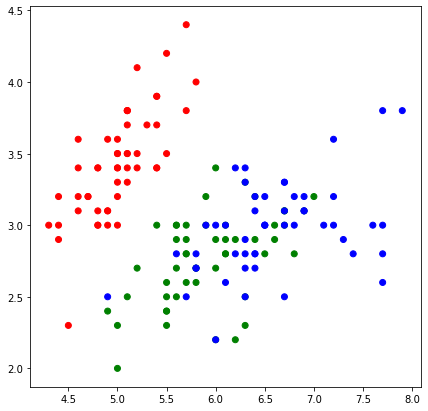

Точность алгоритма при k = 1: 0.667


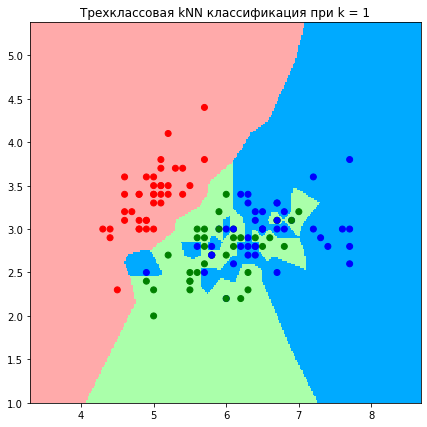

Точность алгоритма при k = 3: 0.733


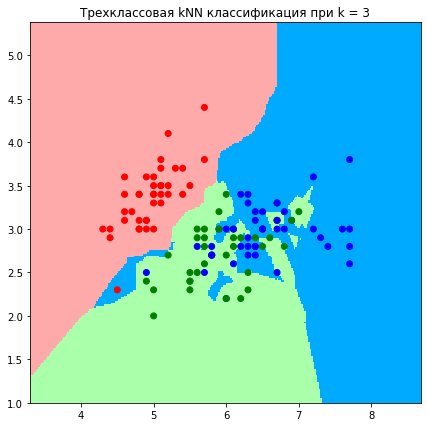

Точность алгоритма при k = 5: 0.867


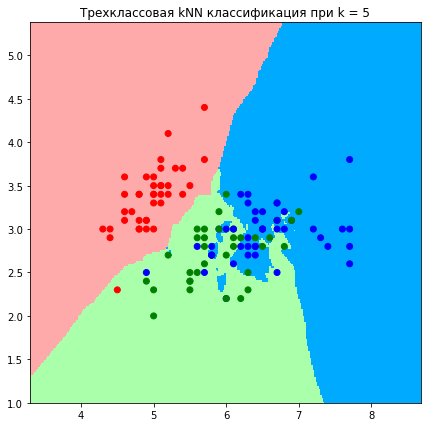

Точность алгоритма при k = 10: 0.833


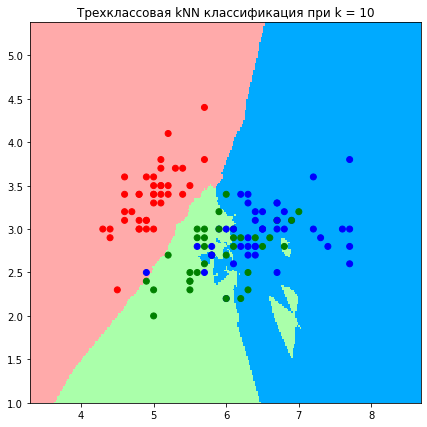

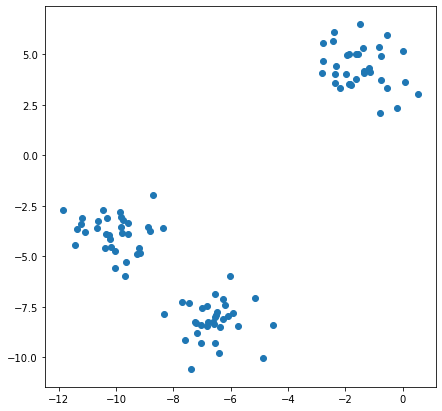

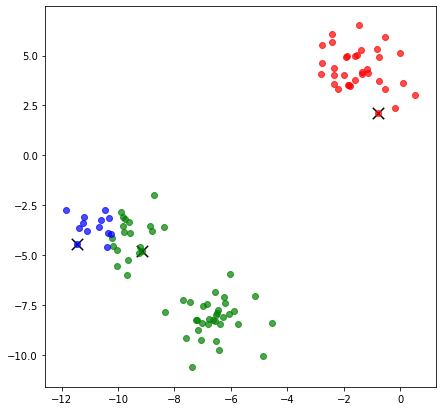

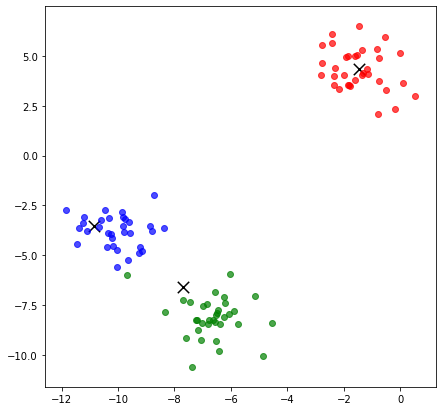

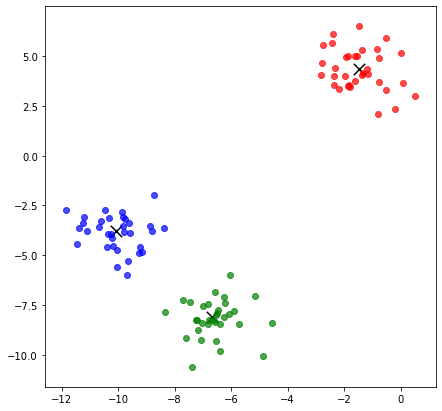

stop: 3


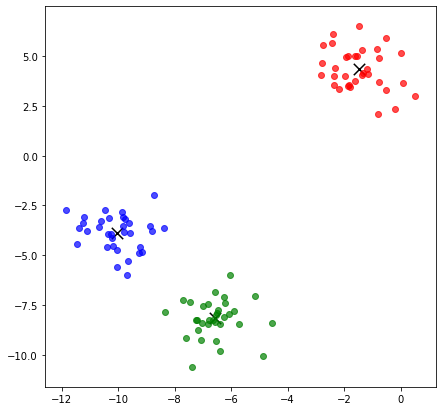

In [1]:
%run ./Lesson_7_280622.ipynb

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [2]:
def knn(x_train, y_train, x_test, k, w_func):
    """алгоритм поиска k ближайших соседей"""
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчёт расстояния от классифицируемого объекта до объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберём k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаём словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        weights = w_func(list(zip(*k_neighbours))[0])
        for d, w in zip(k_neighbours, weights):
            classes[d[1]] += w
            
        # записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [3]:
def get_graph(X_train, y_train, k, w_func):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчёт пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w_func)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трёхклассовая kNN классификация при {k = } ({w_func.__doc__})")
    plt.show()

In [4]:
f1 = lambda ds: [1] * len(ds)  # вес каждого соседа равен 1
f2 = lambda ds: [1/(i+1) for i in range(len(ds))]  # вес обратно пропорционален номеру соседа
f3 = lambda ds: [1/(d+1e-3) for d in ds]  # вес обратно пропорционален расстоянию до соседа
                                          # (добавляем малую величину (1e-3), чтобы избежать деления на ноль)
    
f1.__doc__ = """вес каждого соседа равен 1"""
f2.__doc__ = """вес обратно пропорционален номеру соседа"""
f3.__doc__ = """вес обратно пропорционален расстоянию до соседа"""

In [5]:
for k in range(1, 11):
    for f in (f1, f2, f3):
        y_pred = knn(X_train, y_train, X_test, k, f)
        print(f'Достоверность алгоритма при {k = } ({f.__doc__}): {accuracy(y_pred, y_test):.3f}')
    print()

Достоверность алгоритма при k = 1 (вес каждого соседа равен 1): 0.667
Достоверность алгоритма при k = 1 (вес обратно пропорционален номеру соседа): 0.667
Достоверность алгоритма при k = 1 (вес обратно пропорционален расстоянию до соседа): 0.667

Достоверность алгоритма при k = 2 (вес каждого соседа равен 1): 0.667
Достоверность алгоритма при k = 2 (вес обратно пропорционален номеру соседа): 0.667
Достоверность алгоритма при k = 2 (вес обратно пропорционален расстоянию до соседа): 0.733

Достоверность алгоритма при k = 3 (вес каждого соседа равен 1): 0.733
Достоверность алгоритма при k = 3 (вес обратно пропорционален номеру соседа): 0.667
Достоверность алгоритма при k = 3 (вес обратно пропорционален расстоянию до соседа): 0.733

Достоверность алгоритма при k = 4 (вес каждого соседа равен 1): 0.833
Достоверность алгоритма при k = 4 (вес обратно пропорционален номеру соседа): 0.733
Достоверность алгоритма при k = 4 (вес обратно пропорционален расстоянию до соседа): 0.800

Достоверность ал

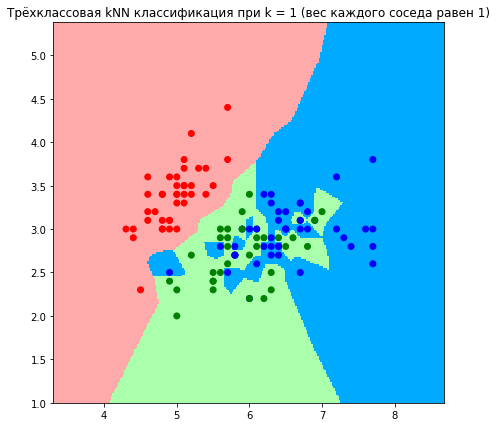

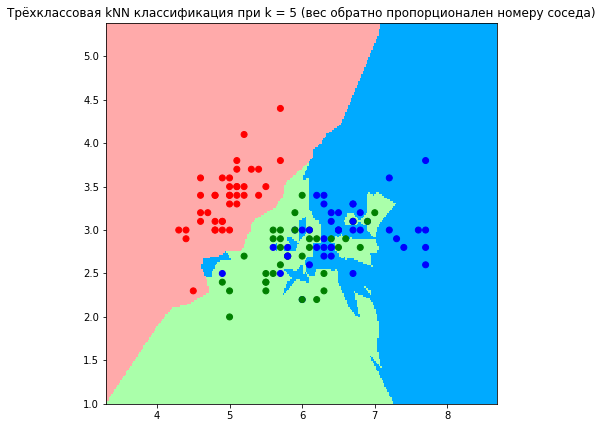

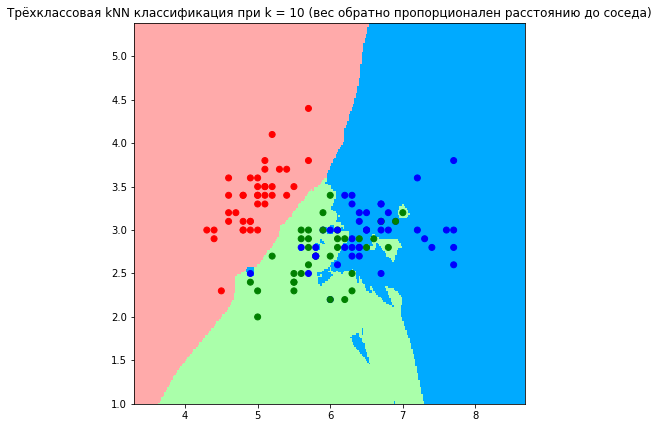

In [9]:
# построим графики для некоторых сочетаний k и f
for k, f in ((1, f1), (5, f2), (10, f3)):
    get_graph(X_train, y_train, k, f)

2. (\*) Напишите функцию подсчёта метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [7]:
def wcrms(centroids, clusters):
    """среднее квадратичное внутрикластерное расстояние (Within Cluster Root Mean Square)"""
    n = 0
    wcss = 0  # Within Cluster Sum Squares
    for i in range(len(centroids)):
        n += len(clusters[i])
        for point in clusters[i]:
            for j in range(len(centroids[0])):
                wcss += np.square(centroids[i][j] - point[j])
    return np.sqrt(wcss / (n*len(centroids[0])))

1: 6.6832067566858475
2: 2.222858189251019
3: 2.173250677112399
4: 2.1351863972312435
5: 1.5039640321082335
6: 1.26274707014157
7: 1.247564708226906
8: 1.2453091299687862
9: 0.8759387502740603
10: 0.7091455162798211


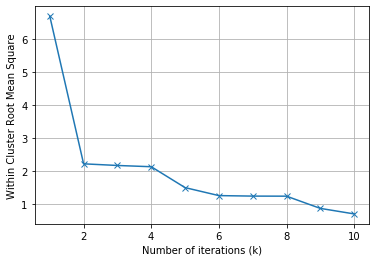

In [8]:
K = 10
max_iterations = 1
min_distance = 1e-4
q = []
for k in range(1, K+1):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    q.append(wcrms(centroids, clusters))
    print(f"{k}: {q[-1]}")

plt.plot(range(1, K+1), q, marker='x')
plt.xlabel("Number of iterations (k)")
plt.ylabel("Within Cluster Root Mean Square")
plt.grid()
plt.show()